<a href="https://colab.research.google.com/github/Ahsan-Ali20/200901025_Machine_Learning/blob/main/Price_Prediction_Laptop_Project_200901025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#==============================================================
#.  **Name: Muahmmad Ahsan Ali**
#.  **Reg Number: 200901025**
#.  **Section: A**
#.  **Course: Machine Learning**
#.  **Project Name: LAPTOP PRICE PREDICTOR**
#==============================================================


In [410]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [411]:
%cd /content/drive/MyDrive/200901025_ML_PROJECT/Ahsan_Ali_Machine_Learning_Project

/content/drive/MyDrive/200901025_ML_PROJECT/Ahsan_Ali_Machine_Learning_Project


In [412]:
import pandas as pd
import numpy as np

In [413]:
data = pd.read_excel('/content/drive/MyDrive/200901025_ML_PROJECT/Ahsan_ML_Project_02/laptop_data.xlsx')
data

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [414]:
data.shape

(1303, 12)

In [415]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [416]:
data.duplicated().sum() #no duplicate columns

0

In [417]:
data.isnull().sum() # no null values present

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64


> ===============================================================
> ## **Tasks which I perform for Data Cleaning**

> - Delete First column Unnamed:0
> - Remove string data from screen resolution column
> - Remove GB from ram and make it int32
> - Remove kg from weight and make it float
> - Make price as int

> ===============================================================


In [418]:
data.drop(columns=['Unnamed: 0'],inplace=True)
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [419]:
data['Ram'] = data['Ram'].str.replace('GB','').astype('int32')
data['Weight'] = data['Weight'].str.replace('kg','').astype('float32')
data['Price'] = data['Price'].astype(int)

In [420]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095


In [421]:
data['Company'].unique() # everthing is fine

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [422]:
data['TypeName'].unique() # everything is fine

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [423]:
data['Inches'].unique()

array([13.3, 15.6, 15.4, 14. , 12. , 11.6, 17.3, 10.1, 13.5, 12.5, 13. ,
       18.4, 13.9, 12.3, 17. , 15. , 14.1, 11.3])

In [424]:
data['ScreenResolution'].unique() # make a lot of changes

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [425]:
data['Cpu'].unique() # need to make changes

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

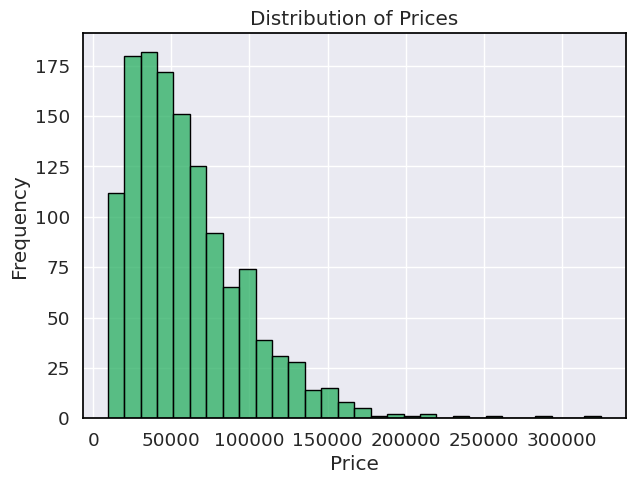

In [426]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'Price' is the column you want to visualize

custom_palette = ["#27ae60", "#9b59b6"]

# Set style and context for the plot
sns.set(style="darkgrid")

sns.set_palette(custom_palette)
sns.set_context("notebook", font_scale=1.2)

# Create the distribution plot using histplot
plt.figure(figsize=(7, 5))
sns.histplot(data['Price'], kde=False, bins=30, edgecolor="black", linewidth=1)

# Set plot labels and title
plt.title("Distribution of Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")

# Change the color of the spines (axes lines) to black
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')

# Show the plot
plt.show()


<ipython-input-427-4601866dab47>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Company', data=data, palette='muted')


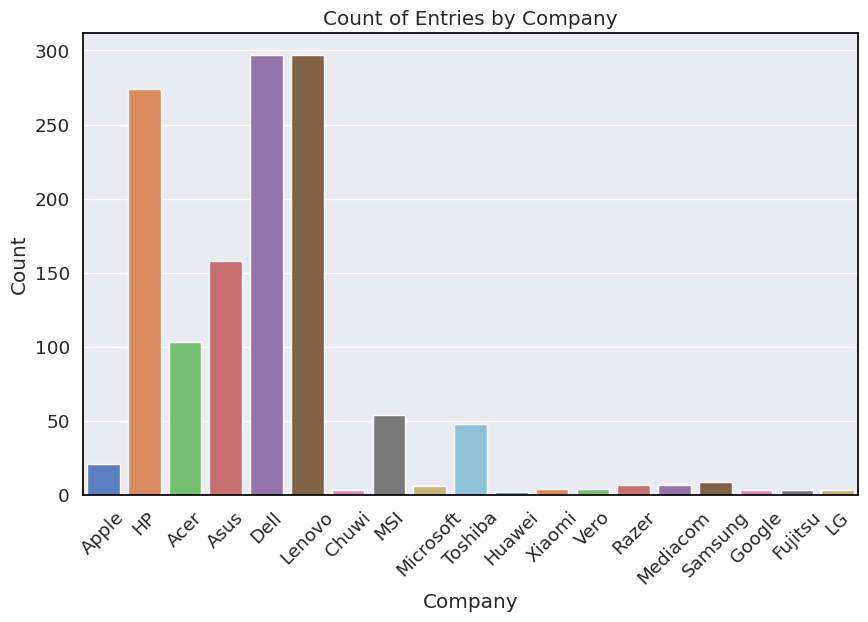

In [427]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'Company' is the column you want to visualize

# Set style and context for the plot
sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.2)

# Create the bar plot using a Seaborn built-in palette
plt.figure(figsize=(10, 6))
sns.countplot(x='Company', data=data, palette='muted')

# Set plot labels and title
plt.title("Count of Entries by Company")
plt.xlabel("Company")
plt.ylabel("Count")

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Change the color of the spines (axes lines) to black
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')

# Show the plot
plt.show()


<ipython-input-428-f7bb716d1c6d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Company', y='Price', data=data, palette='muted')


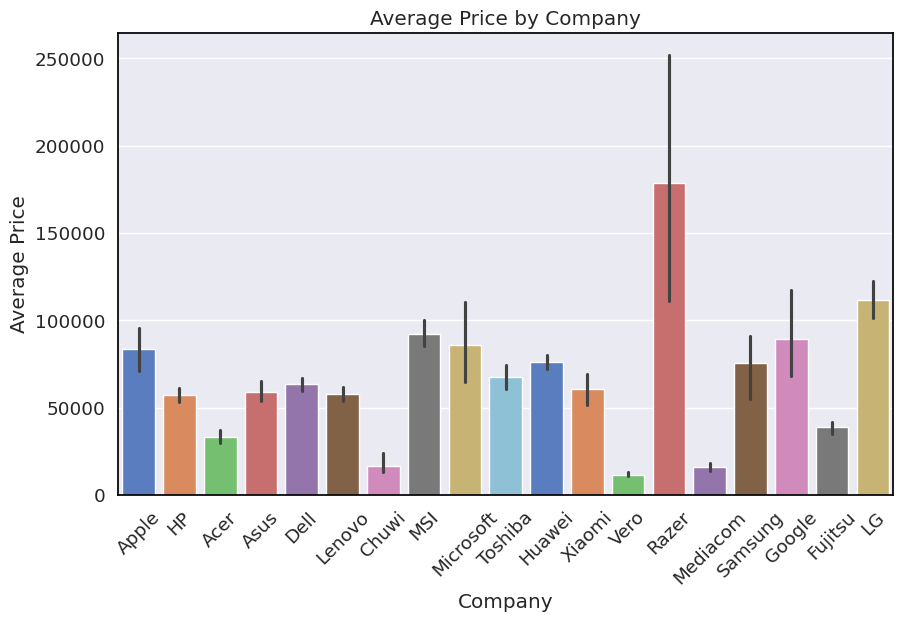

In [428]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'Company' and 'Price' are the columns you want to visualize


# Set style and context for the plot
sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.2)

# Create the bar plot using Seaborn with a custom color palette
plt.figure(figsize=(10, 6))
sns.barplot(x='Company', y='Price', data=data, palette='muted')

# Set plot labels and title
plt.title("Average Price by Company")
plt.xlabel("Company")
plt.ylabel("Average Price")

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Change the color of the spines (axes lines) to black
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')

# Show the plot
plt.show()


<ipython-input-429-a15c3ebc3cc3>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TypeName', data=data, palette='viridis')  # 'viridis' is an example color palette


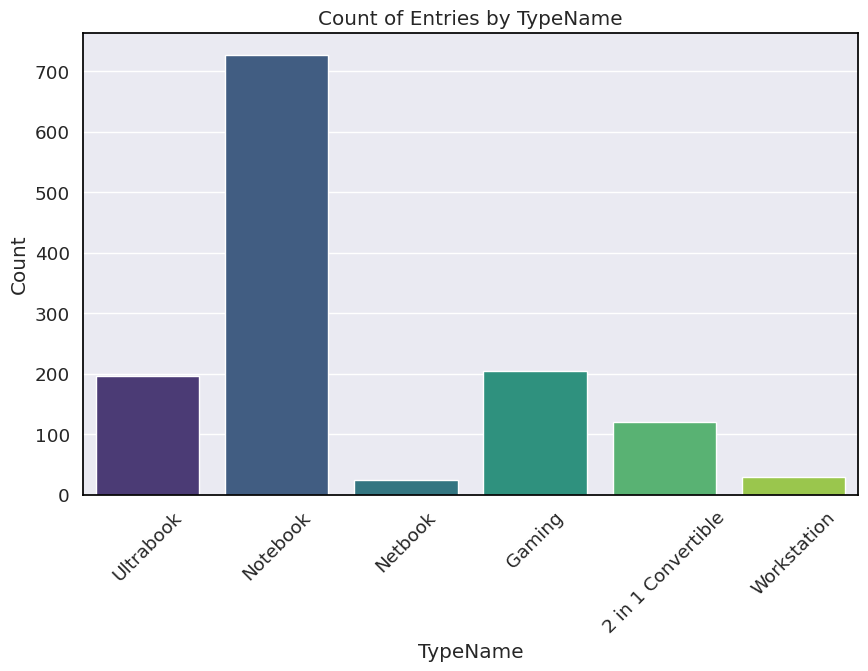

In [429]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'TypeName' is the column you want to visualize

# Set style and context for the plot
sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.2)

# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='TypeName', data=data, palette='viridis')  # 'viridis' is an example color palette

# Set plot labels and title
plt.title("Count of Entries by TypeName")
plt.xlabel("TypeName")
plt.ylabel("Count")

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)
# Change the color of the spines (axes lines) to black
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
# Show the plot
plt.show()


<ipython-input-430-ae91846e49ae>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TypeName', y='Price', data=data, palette='muted')  # 'viridis' is an example color palette


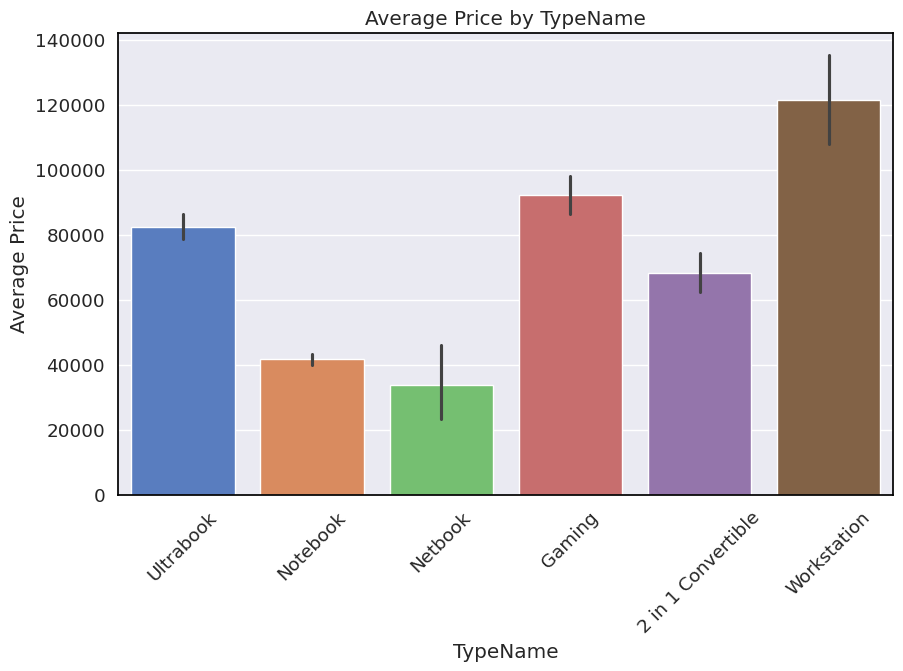

In [430]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'TypeName' and 'Price' are the columns you want to visualize

# Set style and context for the plot
sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.2)

# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='TypeName', y='Price', data=data, palette='muted')  # 'viridis' is an example color palette

# Set plot labels and title
plt.title("Average Price by TypeName")
plt.xlabel("TypeName")
plt.ylabel("Average Price")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
# Change the color of the spines (axes lines) to black
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
# Show the plot
plt.show()


<Figure size 1000x600 with 0 Axes>

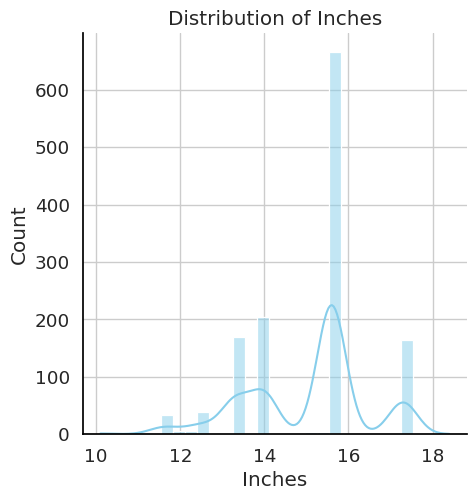

In [431]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'Inches' is the column you want to visualize

# Set style and context for the plot
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Create the distribution plot using Seaborn's displot
plt.figure(figsize=(10, 6))
sns.displot(data['Inches'], kde=True, color='skyblue')

# Set plot labels and title
plt.title("Distribution of Inches")
plt.xlabel("Inches")
plt.ylabel("Count")
# Change the color of the spines (axes lines) to black
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
# Show the plot
plt.show()


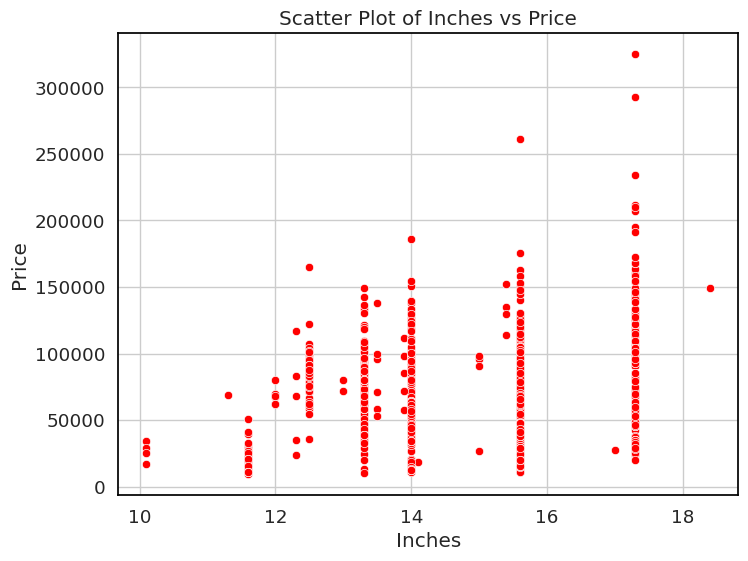

In [432]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'Inches' and 'Price' are the columns you want to visualize

# Set style and context for the plot
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Create the scatter plot using Seaborn's scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Inches', y='Price', data=data, color='red')

# Set plot labels and title
plt.title("Scatter Plot of Inches vs Price")
plt.xlabel("Inches")
plt.ylabel("Price")
# Change the color of the spines (axes lines) to black
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
# Show the plot
plt.show()


In [433]:
data['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [434]:
data['Touchscreen']=data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [435]:
data.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
771,Samsung,2 in 1 Convertible,15.0,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,16,256GB SSD,AMD Radeon 540,Windows 10,1.71,95850,1
512,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Intel HD Graphics 620,Windows 10,2.18,44542,0
1251,HP,Notebook,15.6,1366x768,AMD A6-Series 9220 2.5GHz,4,500GB HDD,AMD Radeon R4 Graphics,Windows 10,1.86,21258,0
298,Lenovo,Notebook,15.6,Full HD 1920x1080,AMD A10-Series 9600P 2.4GHz,6,1TB HDD,AMD Radeon R5 430,Windows 10,2.40,26586,0
242,Asus,Notebook,17.3,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 950M,No OS,2.69,47365,0
209,Lenovo,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.20,31808,0
1219,Acer,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7Y75 1.3GHz,8,256GB SSD,Intel HD Graphics 615,Windows 10,1.20,61218,1
578,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7820HK 2.9GHz,16,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.14,145401,0
31,Asus,Notebook,14.0,1366x768,AMD E-Series E2-6110 1.5GHz,2,32GB Flash Storage,AMD Radeon R2,Windows 10,1.65,10602,0
72,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,AMD Radeon 530,Windows 10,2.20,46353,0


<ipython-input-436-5b6b88445ef5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Touchscreen', data=data, palette='pastel')  # 'pastel' is an example color palette


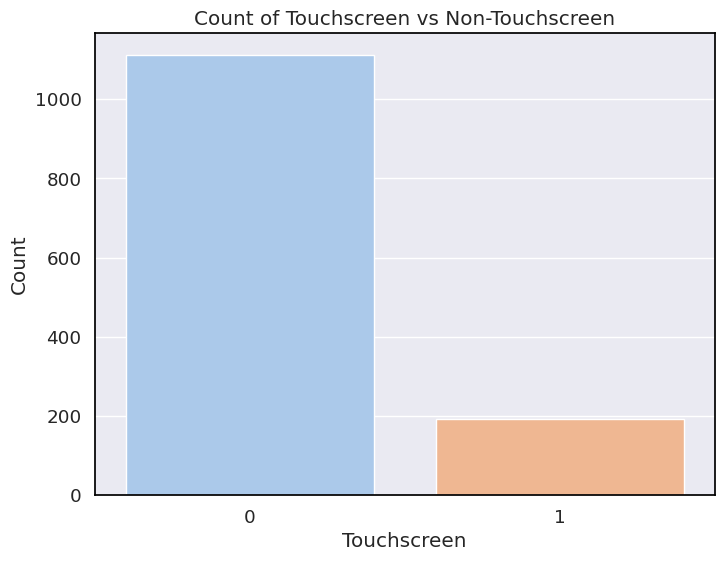

In [436]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'Touchscreen' is the column you want to visualize

# Set style and context for the plot
sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.2)

# Create the bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(x='Touchscreen', data=data, palette='pastel')  # 'pastel' is an example color palette

# Set plot labels and title
plt.title("Count of Touchscreen vs Non-Touchscreen")
plt.xlabel("Touchscreen")
plt.ylabel("Count")
# Change the color of the spines (axes lines) to black
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
# Show the plot
plt.show()


<ipython-input-437-ccb06b61c8ee>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['Touchscreen'],y=data['Price'],data=data, palette='pastel')


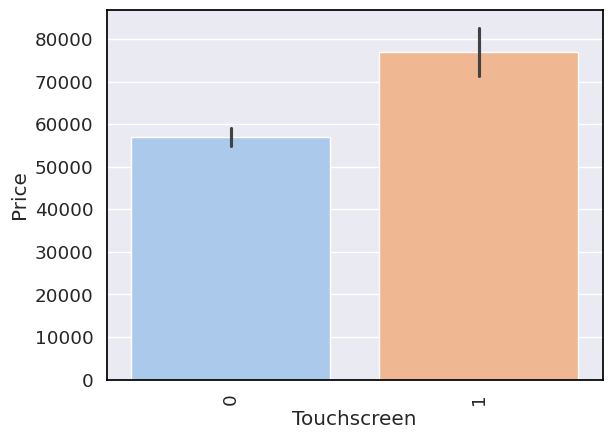

In [437]:
sns.barplot(x=data['Touchscreen'],y=data['Price'],data=data, palette='pastel')
plt.xticks(rotation='vertical')
# Change the color of the spines (axes lines) to black
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
plt.show()

In [438]:
data['IPS']=data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [439]:
data.sample(6)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
284,Acer,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Nvidia GeForce MX150,Windows 10,3.00,50669,0,1
329,Dell,Notebook,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,32,1TB SSD,Nvidia GeForce GTX 1050,Windows 10,2.06,140605,1,0
653,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.20,63499,0,0
994,Dell,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.68,47365,1,0
120,Acer,Notebook,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i3 7100U 2.4GHz,6,1TB HDD,Intel HD Graphics 620,Windows 10,2.10,25521,1,1
162,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,AMD Radeon 520,Windows 10,2.13,38787,0,0


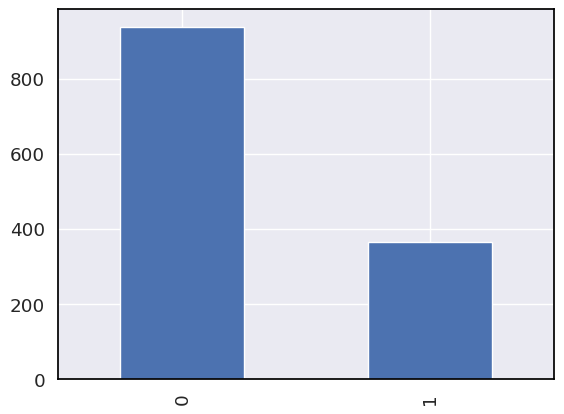

In [440]:
data['IPS'].value_counts().plot(kind='bar')
# Change the color of the spines (axes lines) to black
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')

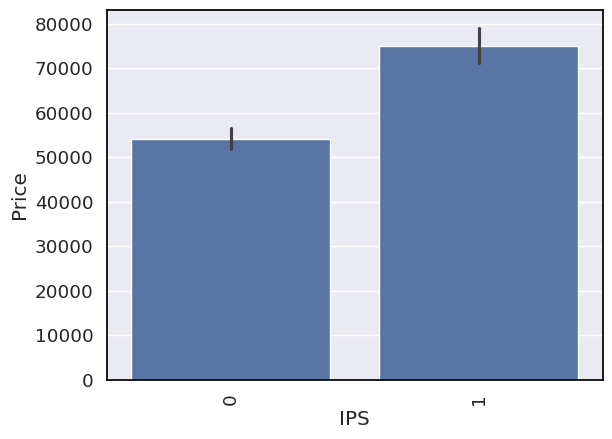

In [441]:
sns.barplot(x=data['IPS'],y=data['Price'])
plt.xticks(rotation='vertical')
# Change the color of the spines (axes lines) to black
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
plt.show()

In [442]:
new=data['ScreenResolution'].str.split('x',n=1,expand = True)

In [443]:
data['x_res'] = new[0]
data['y_res'] = new[1]
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,IPS Panel Retina Display 2560,1600


In [444]:
data['x_res'] = data['x_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [445]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,2560,1600


In [446]:
data['x_res'] = data['x_res'].astype(int)
data['y_res'] = data['y_res'].astype(int)

In [447]:
data['ppi'] = (((data['x_res']**2) + (data['y_res']**2))**0.5/data['Inches']).astype(float)

In [448]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   int64  
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  x_res             1303 non-null   int64  
 14  y_res             1303 non-null   int64  
 15  ppi               1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), int64

In [449]:
data.drop(columns=['ScreenResolution','Inches','x_res','y_res'],inplace=True)

In [450]:
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,226.983005


In [451]:
data['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [452]:
data['Cpu Name'] = data['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [453]:
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,226.983005,Intel Core i5


In [454]:
def fetch_processor(text):
    if text =='Intel Core i5' or text  == 'Intel Core i7' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [455]:
data['Cpu brand'] = data['Cpu Name'].apply(fetch_processor)
data.sample(7)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Name,Cpu brand
108,MSI,Gaming,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.20,69210,0,0,141.211998,Intel Core i7,Intel Core i7
440,Lenovo,Notebook,AMD A6-Series 9220 2.5GHz,8,1TB HDD,AMD Radeon R4,Windows 10,2.80,27652,0,0,106.113062,AMD A6-Series 9220,AMD Processor
1056,HP,Notebook,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,No OS,1.96,26586,0,0,100.454670,Intel Core i5,Intel Core i5
1105,Dell,Ultrabook,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.50,75289,0,0,125.367428,Intel Core i5,Intel Core i5
508,HP,Ultrabook,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.34,70489,0,1,165.632118,Intel Core i7,Intel Core i7
450,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,128GB SSD,Intel HD Graphics 620,Windows 10,1.91,31381,0,0,100.454670,Intel Core i5,Intel Core i5
385,Lenovo,Ultrabook,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.13,121584,0,1,209.800683,Intel Core i7,Intel Core i7


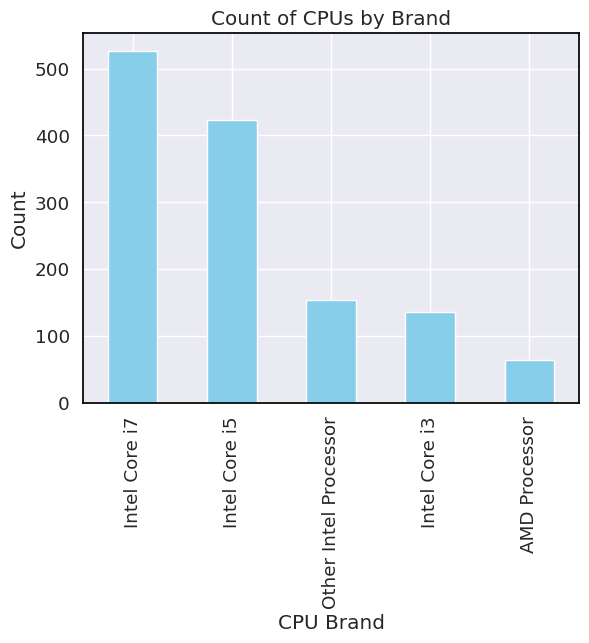

In [456]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'Cpu brand' is the column you want to visualize

# Create the bar plot
data['Cpu brand'].value_counts().plot(kind='bar', color='skyblue')

# Change the color of the spines (axes lines) to black
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')

# Set plot labels and title
plt.title("Count of CPUs by Brand")
plt.xlabel("CPU Brand")
plt.ylabel("Count")

# Show the plot
plt.show()


<ipython-input-457-5ce8a2db50cb>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cpu brand', y='Price', data=data, palette='pastel')  # 'pastel' is an example color palette


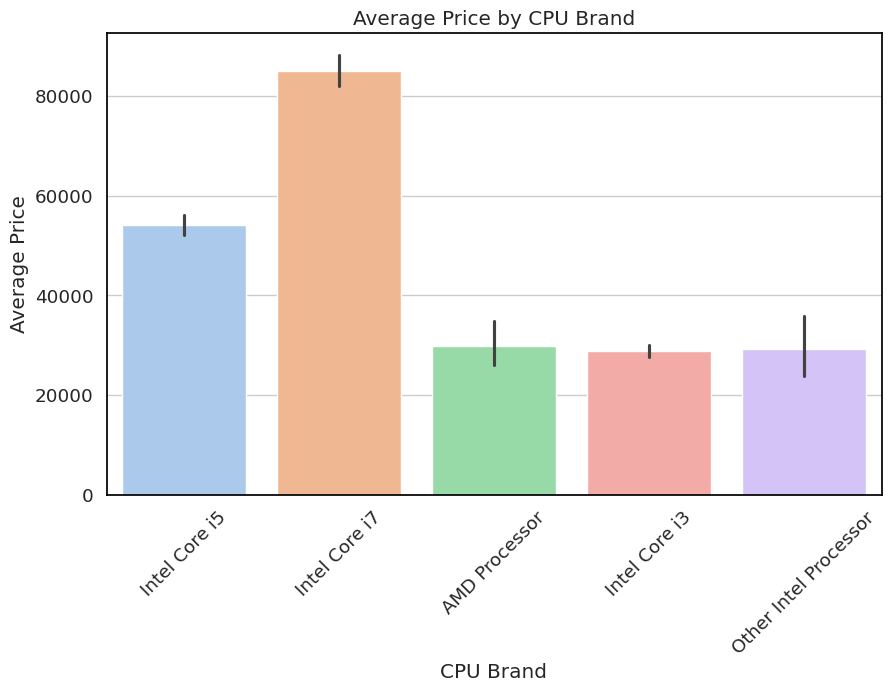

In [457]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'Cpu brand' and 'Price' are the columns you want to visualize

# Set style and context for the plot
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Create the bar plot using Seaborn's barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Cpu brand', y='Price', data=data, palette='pastel')  # 'pastel' is an example color palette

# Set plot labels and title
plt.title("Average Price by CPU Brand")
plt.xlabel("CPU Brand")
plt.ylabel("Average Price")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
# Show the plot
plt.show()


In [458]:
data.drop(columns=['Cpu','Cpu Name'],inplace=True)
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,226.983005,Intel Core i5


<ipython-input-459-5ad9536f318b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ram', y='Price', data=data, palette='pastel')  # 'pastel' is an example color palette


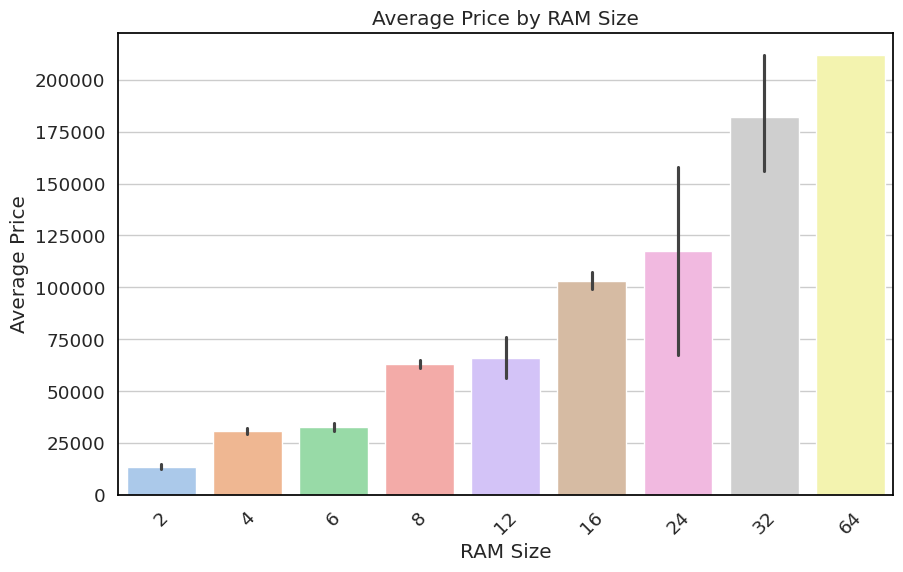

In [459]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'Ram' and 'Price' are the columns you want to visualize

# Set style and context for the plot
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Create the bar plot using Seaborn's barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Ram', y='Price', data=data, palette='pastel')  # 'pastel' is an example color palette

# Set plot labels and title
plt.title("Average Price by RAM Size")
plt.xlabel("RAM Size")
plt.ylabel("Average Price")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
# Show the plot
plt.show()


In [460]:
data['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [461]:
data['Memory'] = data['Memory'].astype(str).replace('\.0', '', regex=True)
data["Memory"] = data["Memory"].str.replace('GB', '')
data["Memory"] = data["Memory"].str.replace('TB', '000')
new = data["Memory"].str.split("+", n = 1, expand = True)

data["first"]= new[0]
data["first"]= data["first"].str.strip()

data["second"]= new[1]

data["Layer1HDD"] = data["first"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer1SSD"] = data["first"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer1Hybrid"] = data["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer1Flash_Storage"] = data["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

data['first'] = data['first'].str.replace(r'\D', '')

data["second"].fillna("0", inplace = True)

data["Layer2HDD"] = data["second"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer2SSD"] = data["second"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer2Hybrid"] = data["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer2Flash_Storage"] = data["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

data['second'] = data['second'].str.replace(r'\D', '')

data["first"] = data["first"].astype(int)
data["second"] = data["second"].astype(int)

data["HDD"]=(data["first"]*data["Layer1HDD"]+data["second"]*data["Layer2HDD"])
data["SSD"]=(data["first"]*data["Layer1SSD"]+data["second"]*data["Layer2SSD"])
data["Hybrid"]=(data["first"]*data["Layer1Hybrid"]+data["second"]*data["Layer2Hybrid"])
data["Flash_Storage"]=(data["first"]*data["Layer1Flash_Storage"]+data["second"]*data["Layer2Flash_Storage"])

data.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage','Memory','Hybrid','Flash_Storage'],inplace=True)


<ipython-input-461-3dd6318f8889>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  data['first'] = data['first'].str.replace(r'\D', '')
<ipython-input-461-3dd6318f8889>:25: FutureWarning: The default value of regex will change from True to False in a future version.
  data['second'] = data['second'].str.replace(r'\D', '')


In [462]:
data.sample(7)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD
916,HP,Notebook,8,Intel HD Graphics 620,Windows 10,1.49,51148,0,0,165.632118,Intel Core i5,0,256
773,Dell,Gaming,8,Nvidia GeForce GTX 1050,Windows 10,2.62,58554,0,0,141.211998,Intel Core i7,1000,0
1084,Dell,Notebook,8,Intel HD Graphics 620,Windows 10,2.18,39960,0,0,141.211998,Intel Core i5,0,256
559,Dell,Notebook,4,AMD Radeon R5 M420,Windows 10,2.18,32921,0,0,100.454670,Intel Core i3,1000,0
533,Mediacom,Notebook,4,Intel HD Graphics 500,Windows 10,1.20,19660,0,1,165.632118,Other Intel Processor,0,32
663,HP,Notebook,6,AMD Radeon R5 M430,Windows 10,2.04,28717,0,0,141.211998,Intel Core i3,1000,0
172,Lenovo,Notebook,4,AMD Radeon R4 Graphics,No OS,2.20,16463,0,0,100.454670,AMD Processor,500,0


In [463]:
data.corr()['Price']

<ipython-input-463-6b59db53f049>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Price']


Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252207
ppi            0.473487
HDD           -0.096442
SSD            0.670799
Name: Price, dtype: float64

In [464]:
data['Gpu brand'] = data['Gpu'].apply(lambda x:x.split()[0])
data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,226.983005,Intel Core i5,0,256,Intel


In [465]:
data = data[data['Gpu brand'] != 'ARM']
data['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

<ipython-input-466-e731c59b699a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gpu brand', y='Price', data=data, palette='pastel')  # 'pastel' is an example color palette


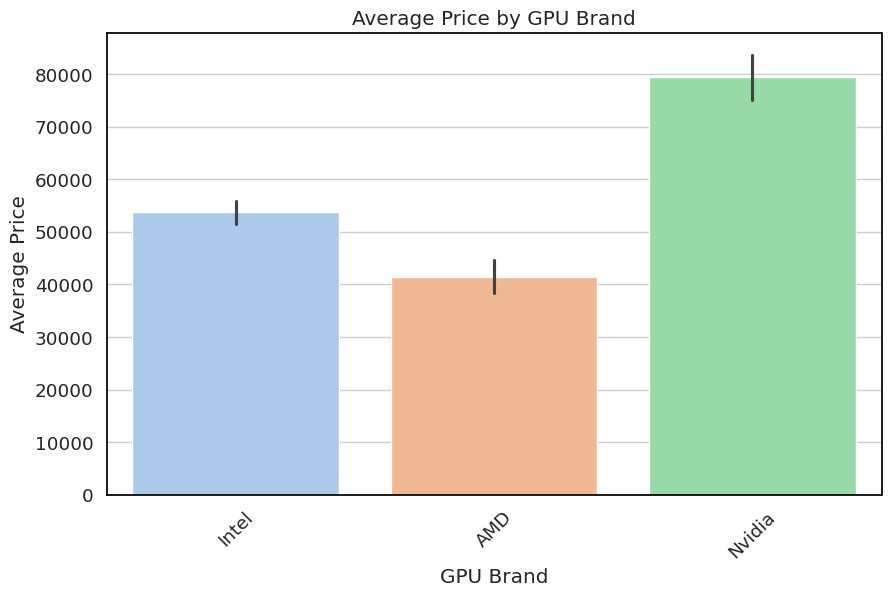

In [466]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'Gpu brand' and 'Price' are the columns you want to visualize

# Set style and context for the plot
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Create the bar plot using Seaborn's barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Gpu brand', y='Price', data=data, palette='pastel')  # 'pastel' is an example color palette

# Set plot labels and title
plt.title("Average Price by GPU Brand")
plt.xlabel("GPU Brand")
plt.ylabel("Average Price")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Change the color of the spines (axes lines) to black
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')

# Show the plot
plt.show()


In [467]:
data.drop(columns=['Gpu'],inplace=True)

<ipython-input-467-0ca0cea83f18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['Gpu'],inplace=True)


In [468]:
data.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095,0,1,226.983005,Intel Core i5,0,256,Intel


In [469]:
data['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

<ipython-input-470-b274f74a9a94>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OpSys', y='Price', data=data, palette='pastel')  # 'pastel' is an example color palette


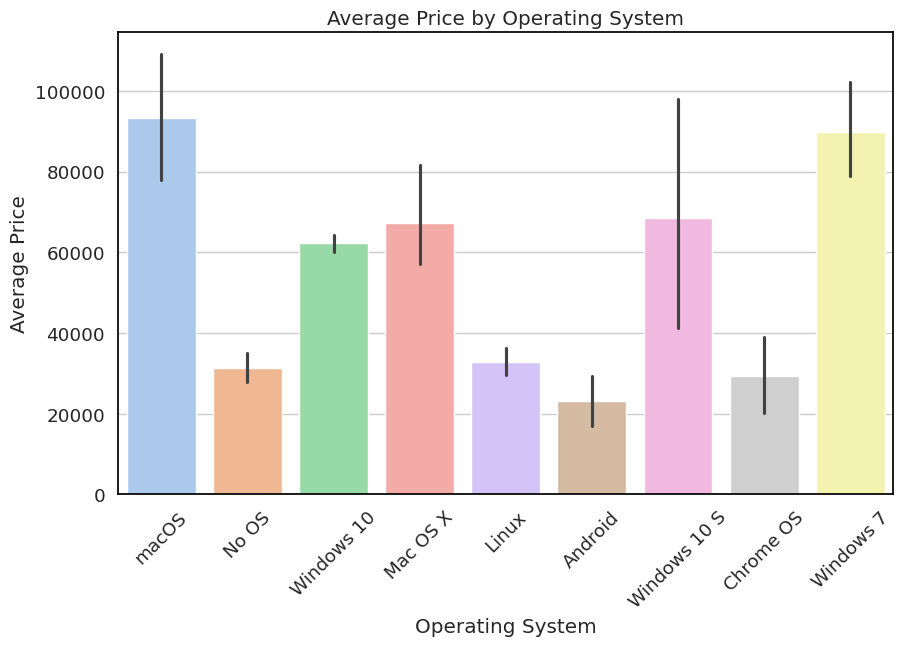

In [470]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'OpSys' and 'Price' are the columns you want to visualize

# Set style and context for the plot
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Create the bar plot using Seaborn's barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='OpSys', y='Price', data=data, palette='pastel')  # 'pastel' is an example color palette

# Set plot labels and title
plt.title("Average Price by Operating System")
plt.xlabel("Operating System")
plt.ylabel("Average Price")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Change the color of the spines (axes lines) to black
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')

# Show the plot
plt.show()


In [471]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Other/Linux/No OS'

In [472]:
data['os'] = data['OpSys'].apply(cat_os)
data.drop(columns=['OpSys'],inplace = True)


<ipython-input-472-9e464e30747b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['os'] = data['OpSys'].apply(cat_os)
<ipython-input-472-9e464e30747b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['OpSys'],inplace = True)


In [473]:
data.sample(9)

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
1274,Asus,Notebook,4,2.20,19660,0,0,100.454670,Other Intel Processor,500,0,Intel,windows
830,Razer,Gaming,32,3.49,292986,1,0,254.671349,Intel Core i7,0,512,Nvidia,windows
752,Asus,Notebook,4,2.45,30849,0,0,100.454670,Intel Core i5,1000,0,Nvidia,Other/Linux/No OS
1126,Lenovo,2 in 1 Convertible,4,0.69,25521,1,1,224.173809,Other Intel Processor,0,0,Intel,windows
1123,Dell,Notebook,4,2.09,27899,0,0,100.454670,Intel Core i5,500,0,Intel,Other/Linux/No OS
1001,HP,Notebook,8,1.34,63349,0,1,165.632118,Intel Core i5,0,256,Intel,windows
955,Dell,Gaming,16,4.36,168045,0,1,254.671349,Intel Core i7,1000,512,Nvidia,windows
1045,HP,Notebook,8,1.84,112065,0,0,141.211998,Intel Core i5,500,256,Intel,windows
1114,Lenovo,2 in 1 Convertible,4,0.69,29250,1,1,224.173809,Other Intel Processor,0,0,Intel,Other/Linux/No OS


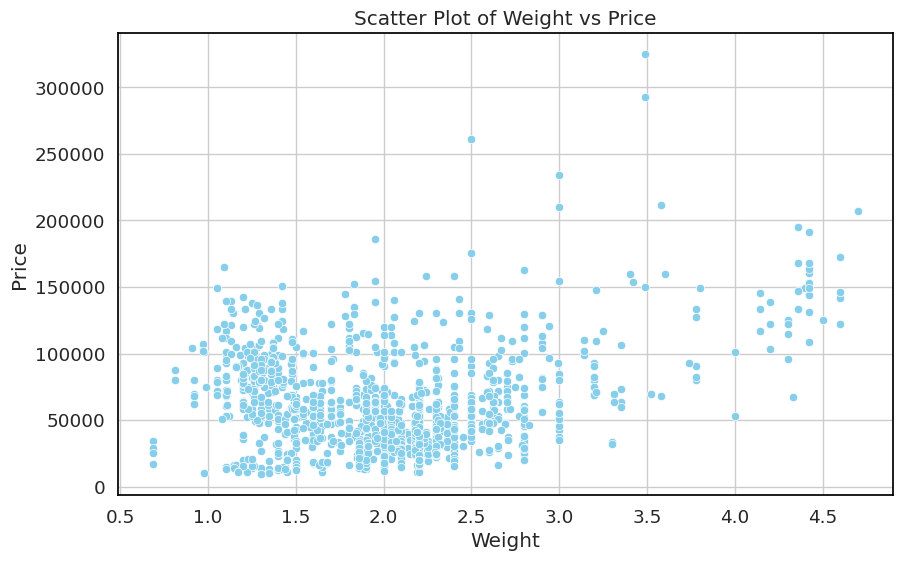

In [474]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'Weight' and 'Price' are the columns you want to visualize

# Set style and context for the plot
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Create the scatter plot using Seaborn's scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Weight', y='Price', data=data, color='skyblue')

# Set plot labels and title
plt.title("Scatter Plot of Weight vs Price")
plt.xlabel("Weight")
plt.ylabel("Price")
# Change the color of the spines (axes lines) to black
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
# Show the plot
plt.show()


<ipython-input-500-82f1978bb92d>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)


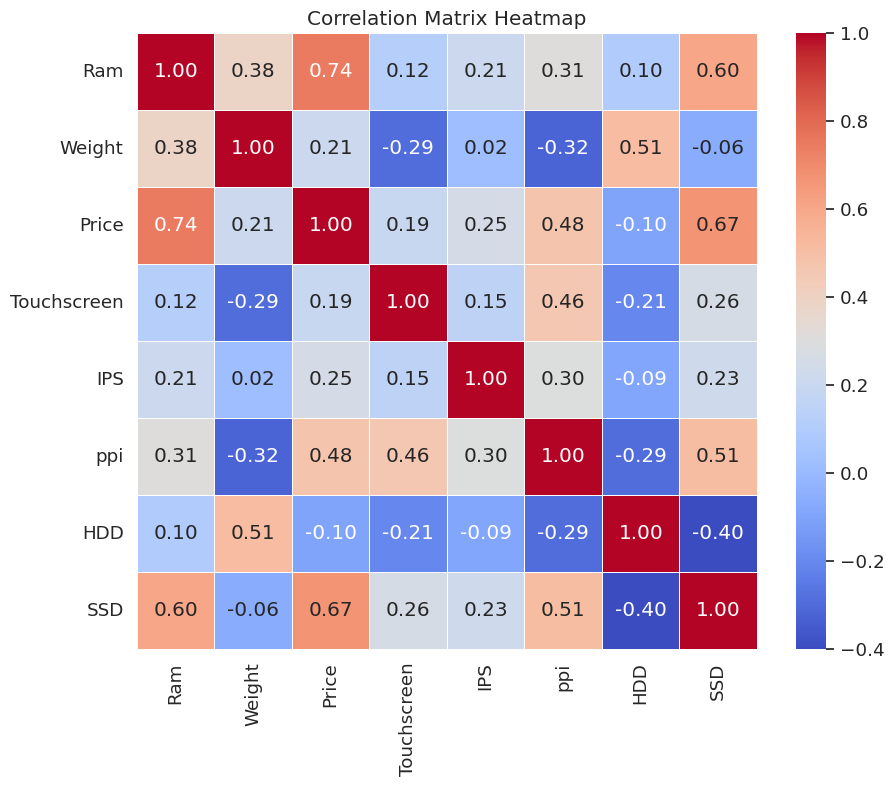

In [500]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame

# Set style and context for the plot
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Create the heatmap using Seaborn's heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)

# Set plot title
plt.title("Correlation Matrix Heatmap")
# Change the color of the spines (axes lines) to black
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
# Show the plot
plt.show()


<ipython-input-476-5e15d2a6fb5a>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data['Price']), kde=False, bins=30, color='skyblue', hist_kws=dict(edgecolor="k", linewidth=1))


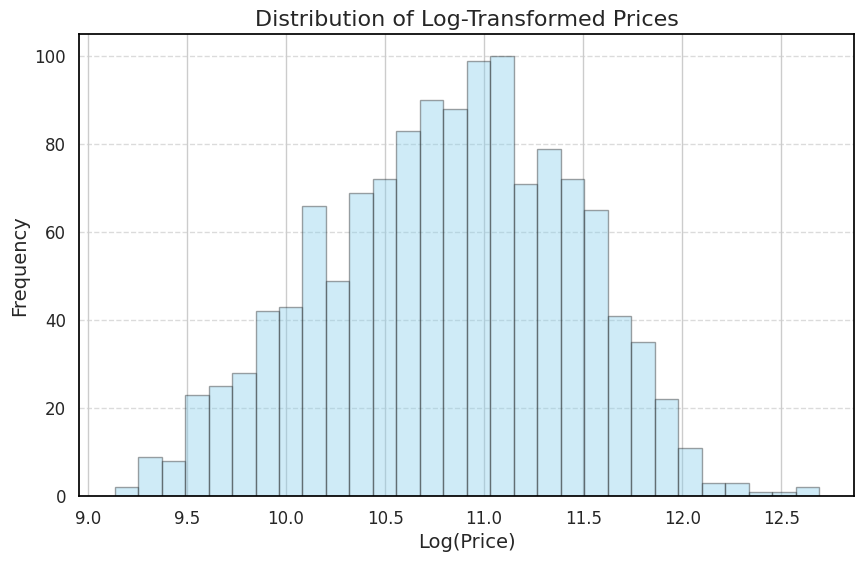

In [476]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is your DataFrame and 'Price' is the column you want to visualize

# Set a color palette
custom_palette = ["#3498db"]

# Set style and context for the plot
sns.set(style="whitegrid")
sns.set_palette(custom_palette)
sns.set_context("notebook", font_scale=1.2)

# Create the distribution plot with log-transformed Price
plt.figure(figsize=(10, 6))
sns.distplot(np.log(data['Price']), kde=False, bins=30, color='skyblue', hist_kws=dict(edgecolor="k", linewidth=1))

# Set plot labels and title
plt.title("Distribution of Log-Transformed Prices", fontsize=16)
plt.xlabel("Log(Price)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Customize x and y axis ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Change the color of the spines (axes lines) to black
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')

# Display a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [477]:
x = data.drop(columns=['Price'])
y = np.log(data['Price'])

In [478]:
x

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Other/Linux/No OS
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,windows


In [479]:
y

0       11.175745
1       10.776766
2       10.329931
3       11.814473
4       11.473093
          ...    
1298    10.433880
1299    11.288106
1300     9.409273
1301    10.614106
1302     9.886341
Name: Price, Length: 1302, dtype: float64

In [480]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [481]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [482]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2, random_state=6227)


> =============================================
> ## **Linear Regression**
> =============================================


In [483]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print("==========================================================")
# scores.append(r2_score(y_test,y_pred))
print("The R2 Score is: ",r2_score(y_test,y_pred))
print("Mean Absolute Error(MAE) Score is: ",mean_absolute_error(y_test,y_pred))
print("==========================================================")
# print(scores[np.argmax(scores)])
# print(np.argmax(scores))

The R2 Score is:  0.8777441642057937
Mean Absolute Error(MAE) Score is:  0.18025727832178512


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



> =============================================
> ## **Ridge Regresssion**
> =============================================



In [484]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print("==========================================================")
print("The R2 Score is: ",r2_score(y_test,y_pred))
print("Mean Absolute Error(MAE) Score is: ",mean_absolute_error(y_test,y_pred))
print("==========================================================")

The R2 Score is:  0.8639472376520967
Mean Absolute Error(MAE) Score is:  0.19083370351799295


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



> =============================================
> ## **K-Nearest Neighbors (KNN)**
> =============================================




In [485]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print("==========================================================")
print("The R2 Score is: ",r2_score(y_test,y_pred))
print("Mean Absolute Error(MAE) Score is: ",mean_absolute_error(y_test,y_pred))
print("==========================================================")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The R2 Score is:  0.8204786256330097
Mean Absolute Error(MAE) Score is:  0.20932967042089515



> =============================================
> ## **Decision Tree**
> =============================================


In [486]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print("==========================================================")
print("The R2 Score is: ",r2_score(y_test,y_pred))
print("Mean Absolute Error(MAE) Score is: ",mean_absolute_error(y_test,y_pred))
print("==========================================================")

The R2 Score is:  0.8525684177835309
Mean Absolute Error(MAE) Score is:  0.18908516730973451


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



> =============================================
> ## **Support Vector Machine (SVM)**
> =============================================


In [487]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print("==========================================================")
print("The R2 Score is: ",r2_score(y_test,y_pred))
print("Mean Absolute Error(MAE) Score is: ",mean_absolute_error(y_test,y_pred))
print("==========================================================")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The R2 Score is:  0.7903736139279589
Mean Absolute Error(MAE) Score is:  0.19442850069406467



> =============================================
> ## **Random Forest**
> =============================================


In [488]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15
                                )
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print("==========================================================")
print("The R2 Score is: ",r2_score(y_test,y_pred))
print("Mean Absolute Error(MAE) Score is: ",mean_absolute_error(y_test,y_pred))
print("==========================================================")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The R2 Score is:  0.910650195727257
Mean Absolute Error(MAE) Score is:  0.14888758885842143





---


> ### **The Random Forest Algorithms gives maximum R2 score**

---






> =============================================
> ## **Extra Tree**
> =============================================



In [489]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=None,
                              max_features=0.75,
                              max_depth=15
                                )
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print("==========================================================")
print("The R2 Score is: ",r2_score(y_test,y_pred))
print("Mean Absolute Error(MAE) Score is: ",mean_absolute_error(y_test,y_pred))
print("==========================================================")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The R2 Score is:  0.9067889597080929
Mean Absolute Error(MAE) Score is:  0.15315984495533805



> =============================================
> ## **AdaBoost**
> =============================================


In [490]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,
                         learning_rate=1.0)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print("==========================================================")
print("The R2 Score is: ",r2_score(y_test,y_pred))
print("Mean Absolute Error(MAE) Score is: ",mean_absolute_error(y_test,y_pred))
print("==========================================================")

The R2 Score is:  0.819167509195728
Mean Absolute Error(MAE) Score is:  0.22988985230396305


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



> =============================================
> ## **Gradient Boost**
> =============================================



In [491]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=100)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print("==========================================================")
print("The R2 Score is: ",r2_score(y_test,y_pred))
print("Mean Absolute Error(MAE) Score is: ",mean_absolute_error(y_test,y_pred))
print("==========================================================")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The R2 Score is:  0.9020984642158338
Mean Absolute Error(MAE) Score is:  0.1558153607938016



> =============================================
> ## **Xgboost**
> =============================================



In [492]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(max_depth=5,learning_rate=0.5)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print("==========================================================")
print("The R2 Score is: ",r2_score(y_test,y_pred))
print("Mean Absolute Error(MAE) Score is: ",mean_absolute_error(y_test,y_pred))
print("==========================================================")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The R2 Score is:  0.908741877018749
Mean Absolute Error(MAE) Score is:  0.14589567640511486



> =============================================
> ## **Voting Regressor**
> =============================================

In [493]:
from sklearn.ensemble import VotingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=None,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf',rf),('gbdt',gbdt),('xgb',xgb),('et',et)],weights=[5,1,1,1])
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print("==========================================================")
print("The R2 Score is: ",r2_score(y_test,y_pred))
print("Mean Absolute Error(MAE) Score is: ",mean_absolute_error(y_test,y_pred))
print("==========================================================")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The R2 Score is:  0.9108311586776769
Mean Absolute Error(MAE) Score is:  0.14886888833287132


> ========================================================
> ### **Exporting model using random forest classifier**
> ========================================================

In [494]:
import pickle
pickle.dump(pipe, open('pipe.pkl', 'wb'))
pickle.dump(data, open('data.pkl', 'wb'))

In [495]:
data

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636,0,0,141.211998,Intel Core i5,0,256,Intel,Other/Linux/No OS
3,Apple,Ultrabook,16,1.83,135195,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992,1,1,157.350512,Intel Core i7,0,128,Intel,windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866,1,1,276.053530,Intel Core i7,0,512,Intel,windows
1300,Lenovo,Notebook,2,1.50,12201,0,0,111.935204,Other Intel Processor,0,0,Intel,windows
1301,HP,Notebook,6,2.19,40705,0,0,100.454670,Intel Core i7,1000,0,AMD,windows


In [496]:
!pip install streamlit -q

In [497]:
!pip install --upgrade streamlit


In [498]:
!curl https://loca.lt/mytunnelpassword #            34.91.209.40

34.91.209.40

In [499]:
! streamlit run main.py & npx localtunnel --port 8501

[..................] / rollbackFailedOptional: verb npm-session ff29fb95755e025


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.91.209.40:8501

npx: installed 22 in 3.599s
your url is: https://ready-hornets-sing.loca.lt
  Stopping...
^C
